In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [149]:
data_frame = pd.read_csv('D:/Bootcamp/Tugas/Capstone_Project_3/California House/data_california_house.csv',sep=',')

In [150]:
data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [130]:
pd.DataFrame({
    'feature':data_frame.columns.values,
    'data_type':data_frame.dtypes.values,
    'null_value_in_precentage_(%)':data_frame.isna().mean().values*100,
    'negative_value_in_precentage_(%)':[len(data_frame[col][data_frame[col]<0])/len(data_frame)*100 if col in data_frame.select_dtypes(include=[np.number]).columns else 0 for col in data_frame.columns],
    'zero/0_value_in_percentage_(%)':[len(data_frame[col][data_frame[col]==0])/len(data_frame)*100 if col in data_frame.select_dtypes(include=[np.number]).columns else 0 for col in data_frame.columns],
    'duplicate':data_frame.duplicated().sum(),
    'n_unique':data_frame.nunique().values,
    'sample_unique':[data_frame[col].unique() for col in data_frame.columns]
}).round(3)

,feature,data_type,null_value_in_precentage_(%),negative_value_in_precentage_(%),zero/0_value_in_percentage_(%),duplicate,n_unique,sample_unique
0,longitude,float64,0.000,100.0,0.0,0,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0.000,0.0,0.0,0,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0.000,0.0,0.0,0,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0.000,0.0,0.0,0,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,0.948,0.0,0.0,0,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0.000,0.0,0.0,0,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0.000,0.0,0.0,0,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0.000,0.0,0.0,0,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0.000,0.0,0.0,0,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0.000,0.0,0.0,0,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


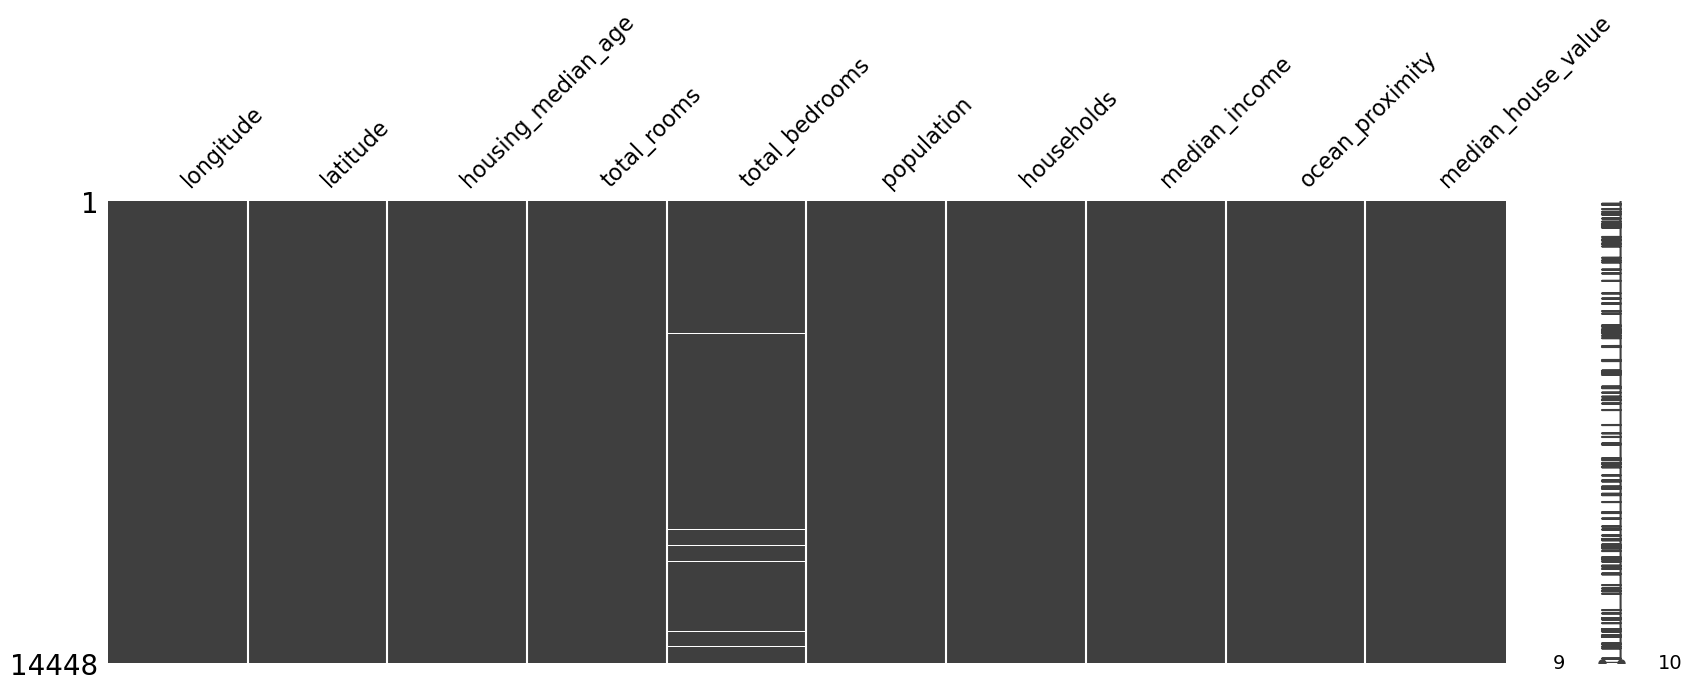

In [131]:
msno.matrix(data_frame,figsize=(20,6))
plt.show()

In [133]:
print(data_frame['total_bedrooms'])

0          28.0
1         328.0
2         396.0
3        1196.0
4         194.0
          ...  
14443     229.0
14444     195.0
14445       NaN
14446     498.0
14447     328.0
Name: total_bedrooms, Length: 14448, dtype: float64


In [134]:
data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


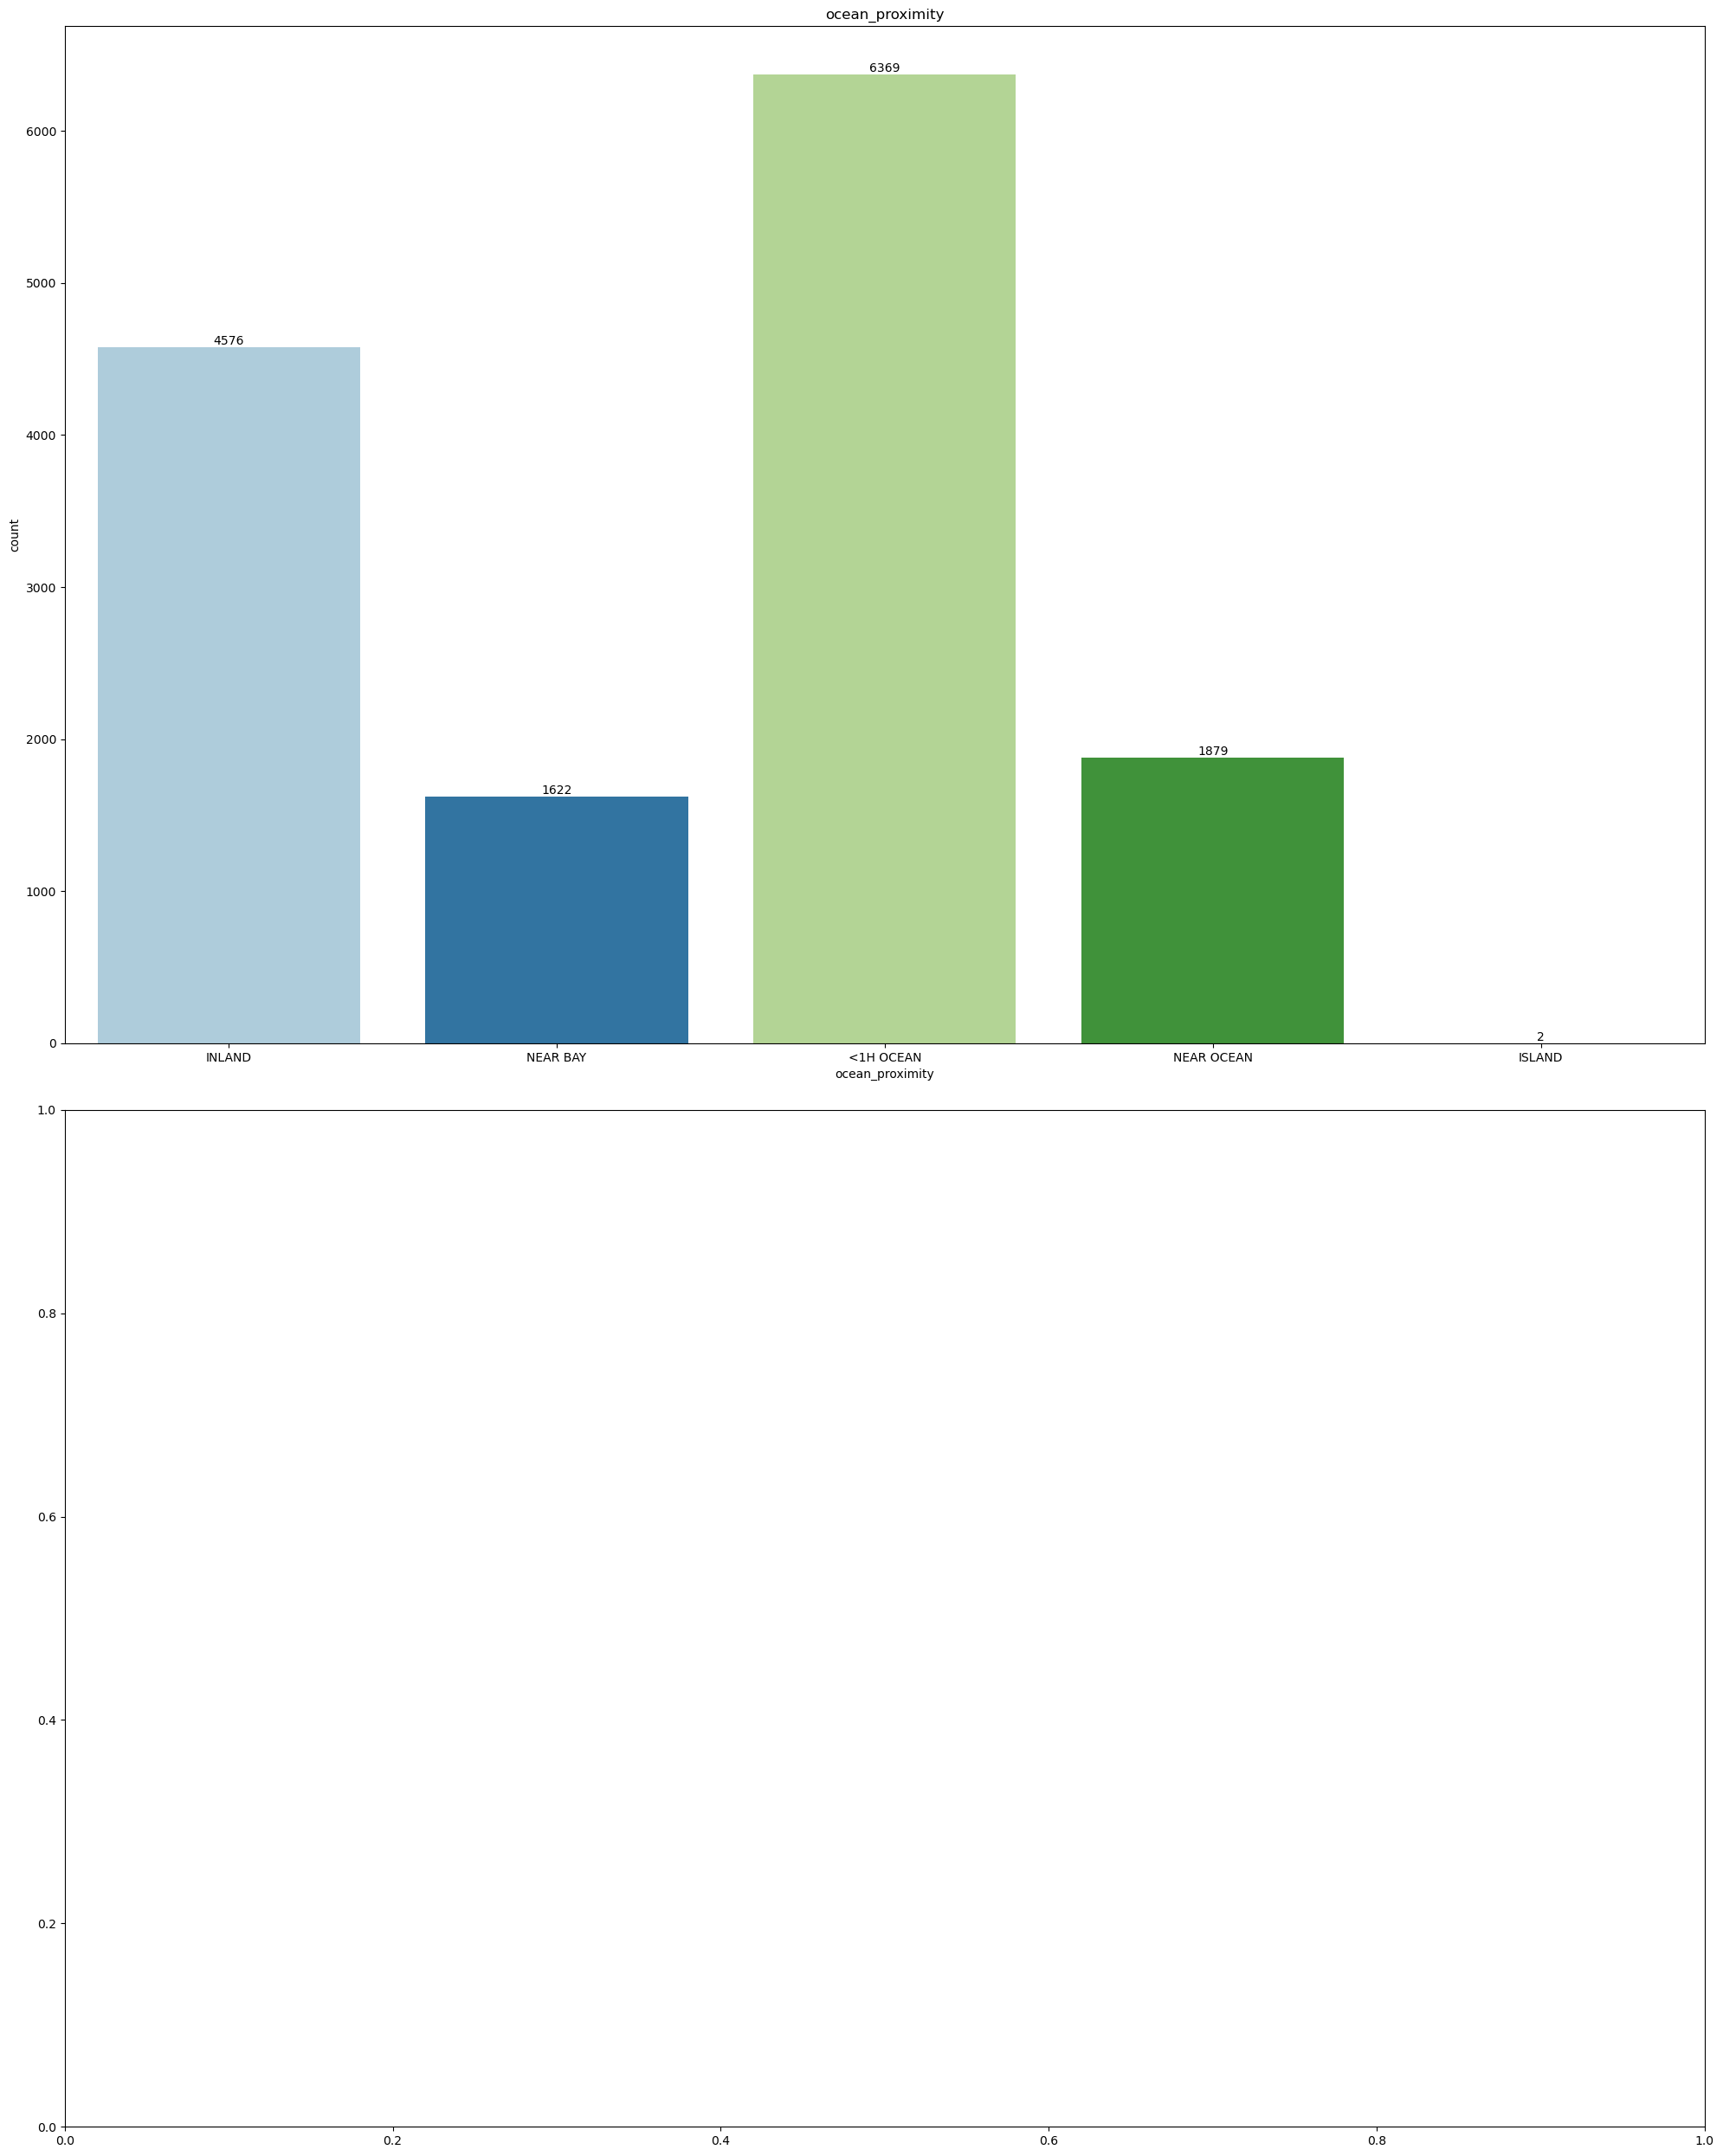

In [132]:
columns = ['ocean_proximity']

fig,axis = plt.subplots(ncols=1,nrows=2,figsize=(20, 25))
axis = axis.flatten()

for i, column in enumerate(columns):
    bars = sns.countplot(data=data_frame, x=column, palette=sns.color_palette('Paired'), ax=axis[i])
    axis[i].set_title(column)
    for idx, bar in enumerate(bars.patches):
        x_value = bar.get_x() + bar.get_width() / 2
        y_value = bar.get_height()
        label = "{:.0f}".format(bar.get_height())
        axis[i].text(x_value,y_value,label,ha='center',va='bottom') 

plt.tight_layout(w_pad=0.5,h_pad=2)
plt.show()

In [148]:
print(data_frame['ocean_proximity'].dtypes)

int64


In [136]:
data_frame['ocean_proximity'] = data_frame['ocean_proximity'].map({'INLAND':1,'NEAR BAY':2,'<1H OCEAN':3,'NEAR OCEAN':4,'ISLAND':5})
data_frame['ocean_proximity'].value_counts()

ocean_proximity
3    6369
1    4576
4    1879
2    1622
5       2
Name: count, dtype: int64

In [137]:
data_frame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,2.384621,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,1.063553,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,1.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,1.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,3.000000,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,3.000000,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,5.000000,500001.000000


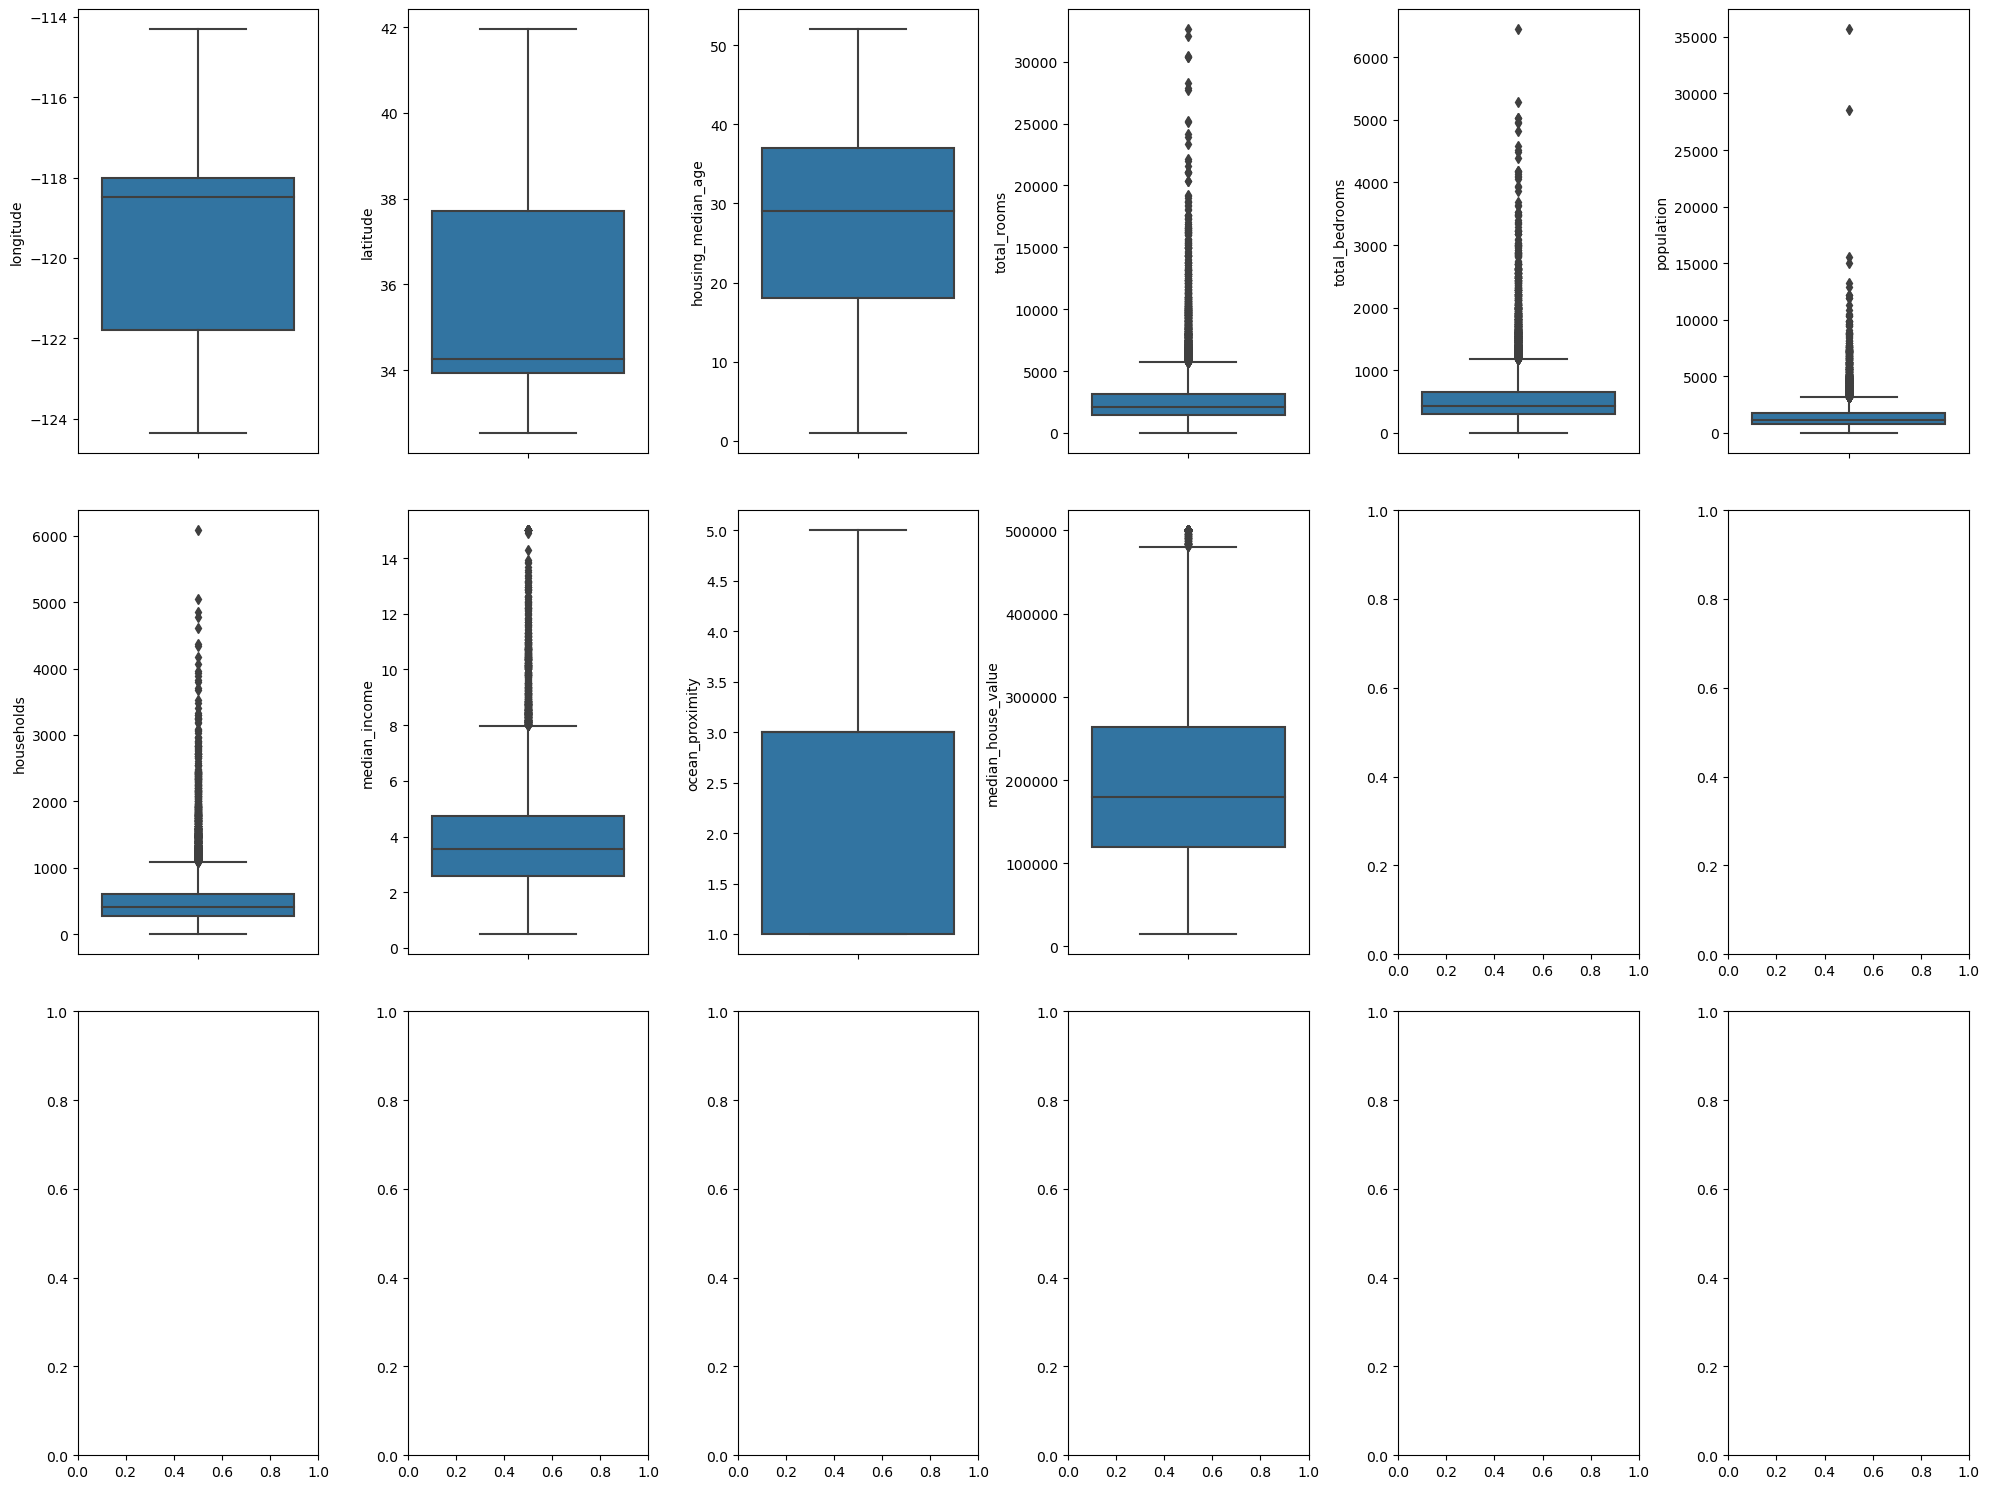

In [138]:
fig, axis = plt.subplots(ncols=6,nrows=3,figsize=(20,15))
index = 0
axis = axis.flatten()
for a, b in data_frame.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=a, data=data_frame, ax=axis[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)

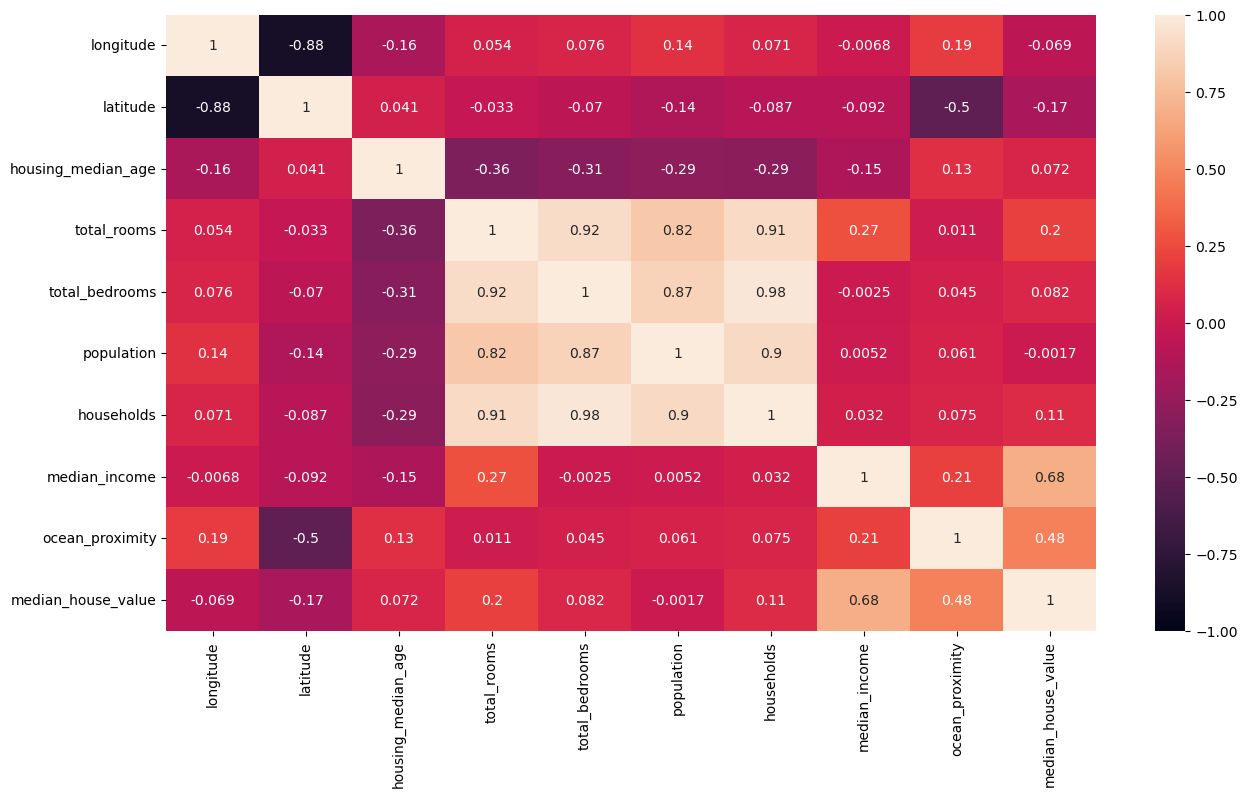

In [139]:
plt.figure(figsize=(15,8))
sns.heatmap(data_frame.corr('spearman'),vmin=-1,vmax=1,annot=True)
plt.show()

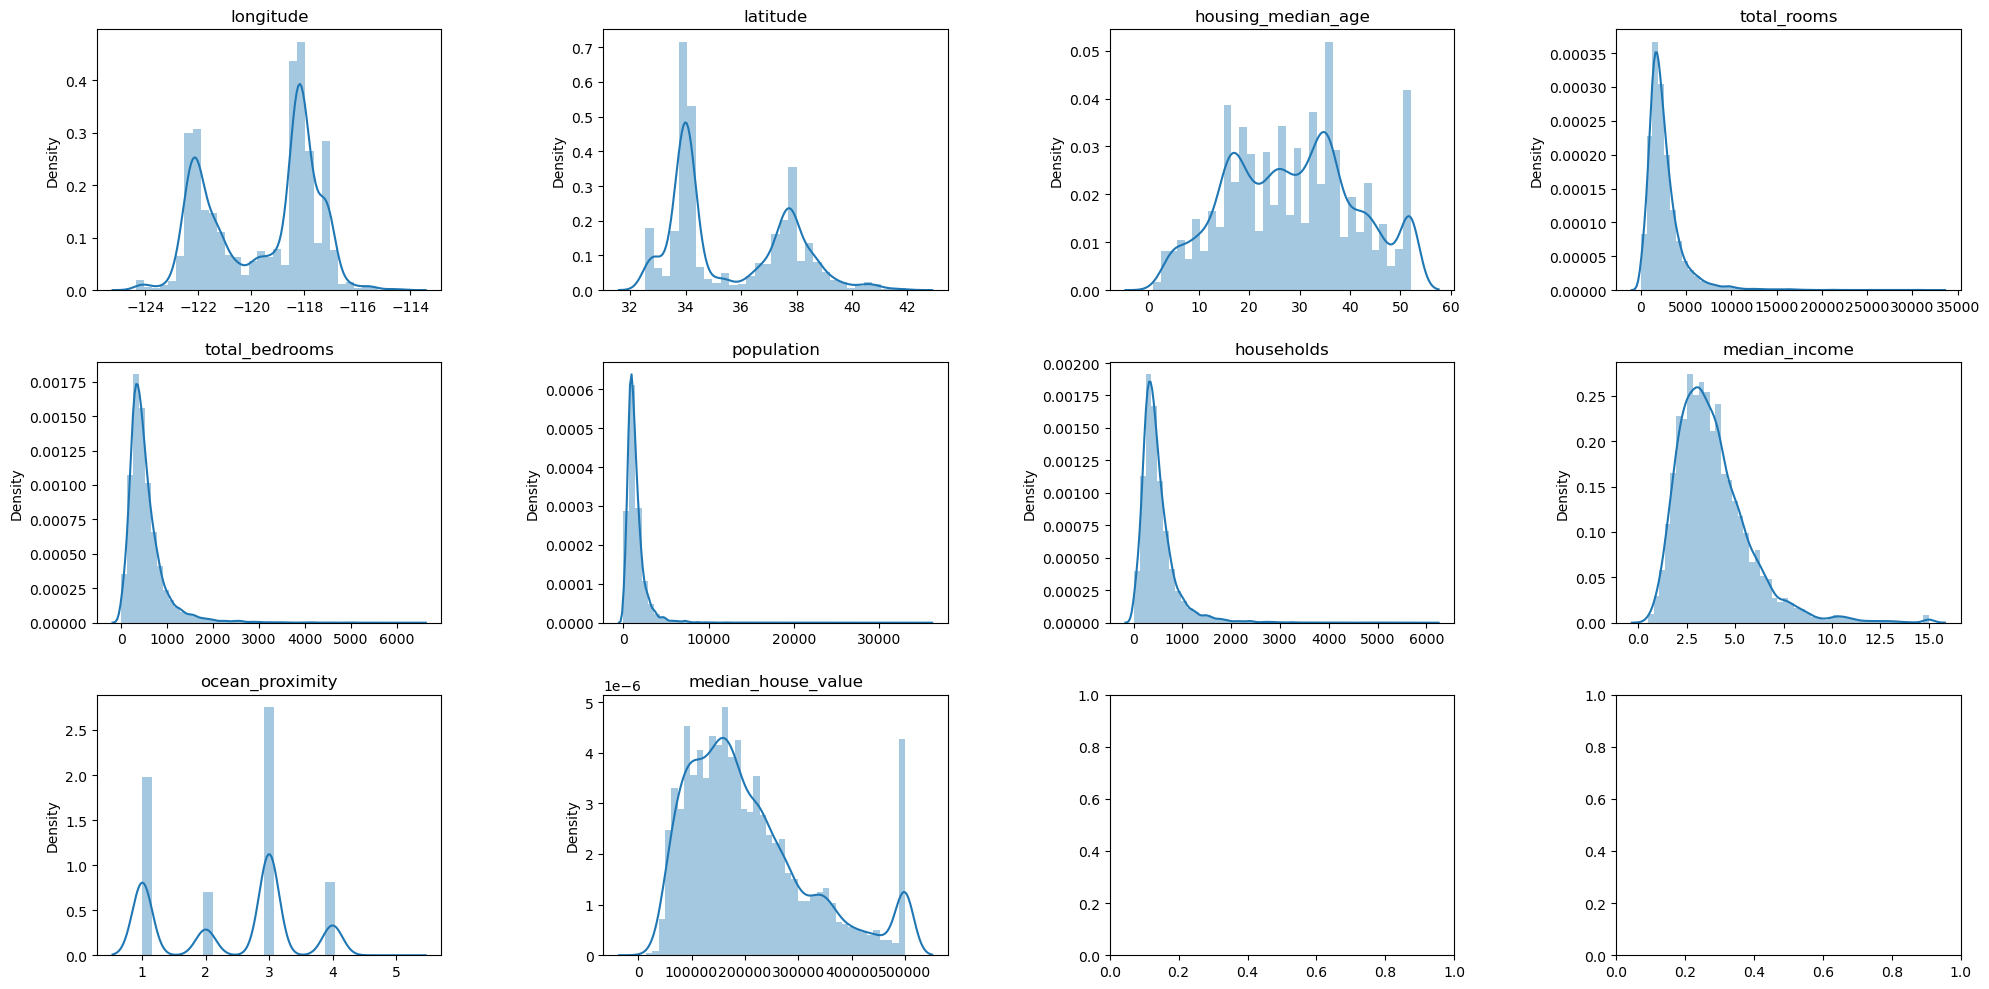

In [140]:
fig,axis = plt.subplots(ncols=4,nrows=3,figsize=(20,10))
index = 0
axis = axis.flatten()
for k, v in data_frame.select_dtypes(include=[np.number]).items():
    axis[index].set_title(k)
    sns.distplot(x=data_frame[k],ax=axis[index])
    index += 1
plt.tight_layout(w_pad=5,h_pad=2)
plt.show()

In [142]:
duplicate_value = data_frame[data_frame.duplicated(subset=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'], keep=False)]
duplicate_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [145]:
pd.DataFrame({
    'feature':data_frame.columns.values,
    'negative_value_in_percentage_(%)':[len(data_frame[col][data_frame[col] < 0])/len(data_frame)*100 if np.issubdtype(data_frame[col].dtype,np.number) else 0 for col in data_frame.columns]
}).round(3)

,feature,negative_value_in_percentage_(%)
0,longitude,100.0
1,latitude,0.0
2,housing_median_age,0.0
3,total_rooms,0.0
4,total_bedrooms,0.0
5,population,0.0
6,households,0.0
7,median_income,0.0
8,ocean_proximity,0.0
9,median_house_value,0.0


In [146]:
pd.DataFrame({
    'feature':data_frame.columns.values,
    'data_type':data_frame.dtypes.values,
    'zero/0_value_in_precentage_(%)':[len(data_frame[col][data_frame[col] == 0])/len(data_frame)*100 if np.issubdtype(data_frame[col].dtype,np.number) else 0 for col in data_frame.columns]
}).round(3)

,feature,data_type,zero/0_value_in_precentage_(%)
0,longitude,float64,0.0
1,latitude,float64,0.0
2,housing_median_age,float64,0.0
3,total_rooms,float64,0.0
4,total_bedrooms,float64,0.0
5,population,float64,0.0
6,households,float64,0.0
7,median_income,float64,0.0
8,ocean_proximity,int64,0.0
9,median_house_value,float64,0.0


In [151]:
pd.DataFrame({
    'feature': data_frame.columns.values,
    'data_type': data_frame.dtypes.values,
    'null_value_in_percentage_(%)': data_frame.isna().mean().values*100
}).round(3)

,feature,data_type,null_value_in_percentage_(%)
0,longitude,float64,0.000
1,latitude,float64,0.000
2,housing_median_age,float64,0.000
3,total_rooms,float64,0.000
4,total_bedrooms,float64,0.948
5,population,float64,0.000
6,households,float64,0.000
7,median_income,float64,0.000
8,ocean_proximity,object,0.000
9,median_house_value,float64,0.000


In [152]:
data_frame['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: count, dtype: int64

In [154]:
data_frame.groupby(['ocean_proximity', 'median_house_value', 'housing_median_age', 'total_rooms', 'total_bedrooms'])['ocean_proximity'].count

ocean_proximity  median_house_value  housing_median_age  total_rooms  total_bedrooms
<1H OCEAN        17500.0             39.0                493.0        168.0             1
                 36700.0             31.0                938.0        238.0             1
                 38800.0             52.0                281.0        103.0             1
                 45000.0             21.0                1342.0       326.0             1
                 46900.0             25.0                1995.0       637.0             1
                                                                                       ..
NEAR OCEAN       500001.0            52.0                1900.0       290.0             1
                                                         2059.0       345.0             1
                                                         2151.0       280.0             1
                                                         2170.0       269.0             1
               

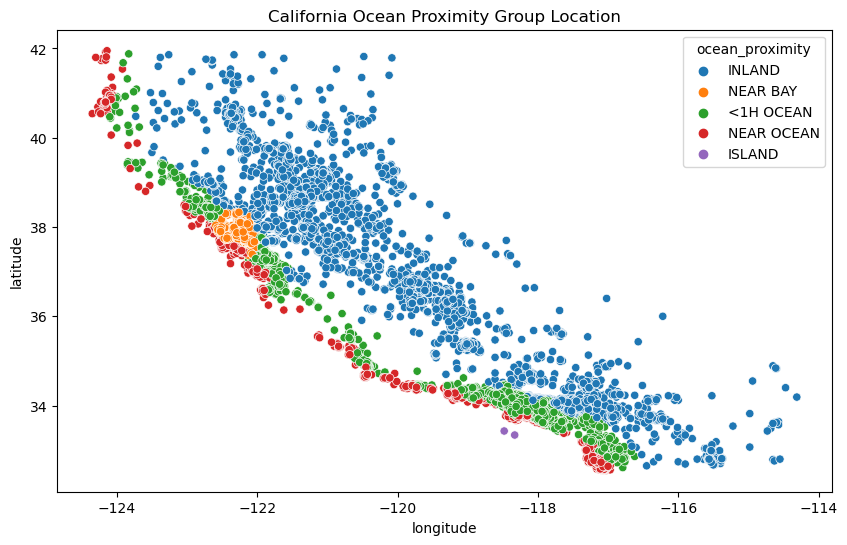

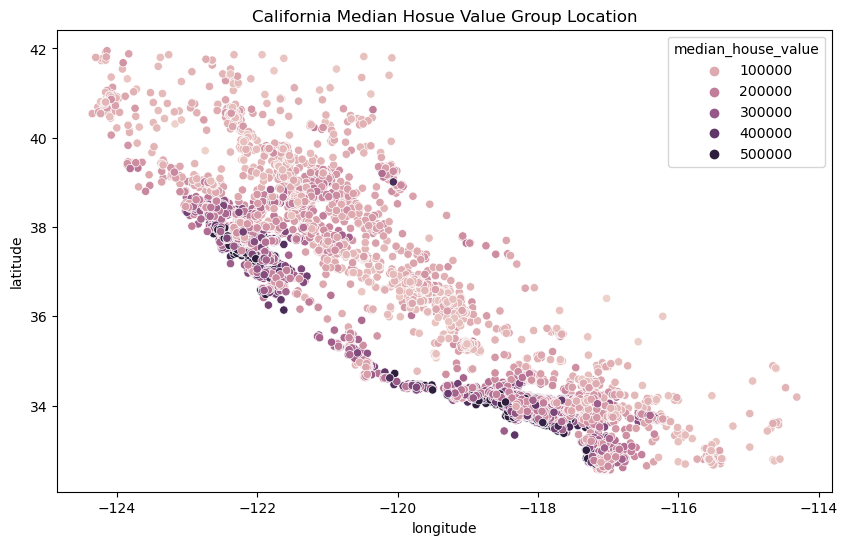

In [158]:
# Plot lokasi 'ocean_proximity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_frame['longitude'], y=data_frame['latitude'], hue=data_frame['ocean_proximity']).set_title('California Ocean Proximity Group Location')

# Plot persebaran 'median_house_value'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_frame['longitude'], y=data_frame['latitude'], hue=data_frame['median_house_value']).set_title('California Median Hosue Value Group Location');

In [160]:
print(data_frame['total_bedrooms'].value_counts())
print('Total NaN values: ',len(data_frame[data_frame['total_bedrooms'].isna()]))

total_bedrooms
331.0     39
348.0     38
289.0     38
426.0     36
312.0     36
          ..
2595.0     1
1712.0     1
1384.0     1
2062.0     1
2387.0     1
Name: count, Length: 1748, dtype: int64
Total NaN values:  137


In [161]:
data_frame['total_bedrooms'].fillna(data_frame['total_bedrooms'].median(),inplace=True)

print(data_frame['total_bedrooms'].value_counts())
print('Total NaN values: ',len(data_frame[data_frame['total_bedrooms'].isna()]))

total_bedrooms
435.0     163
331.0      39
348.0      38
289.0      38
426.0      36
         ... 
2595.0      1
1712.0      1
1384.0      1
2062.0      1
2387.0      1
Name: count, Length: 1748, dtype: int64
Total NaN values:  0


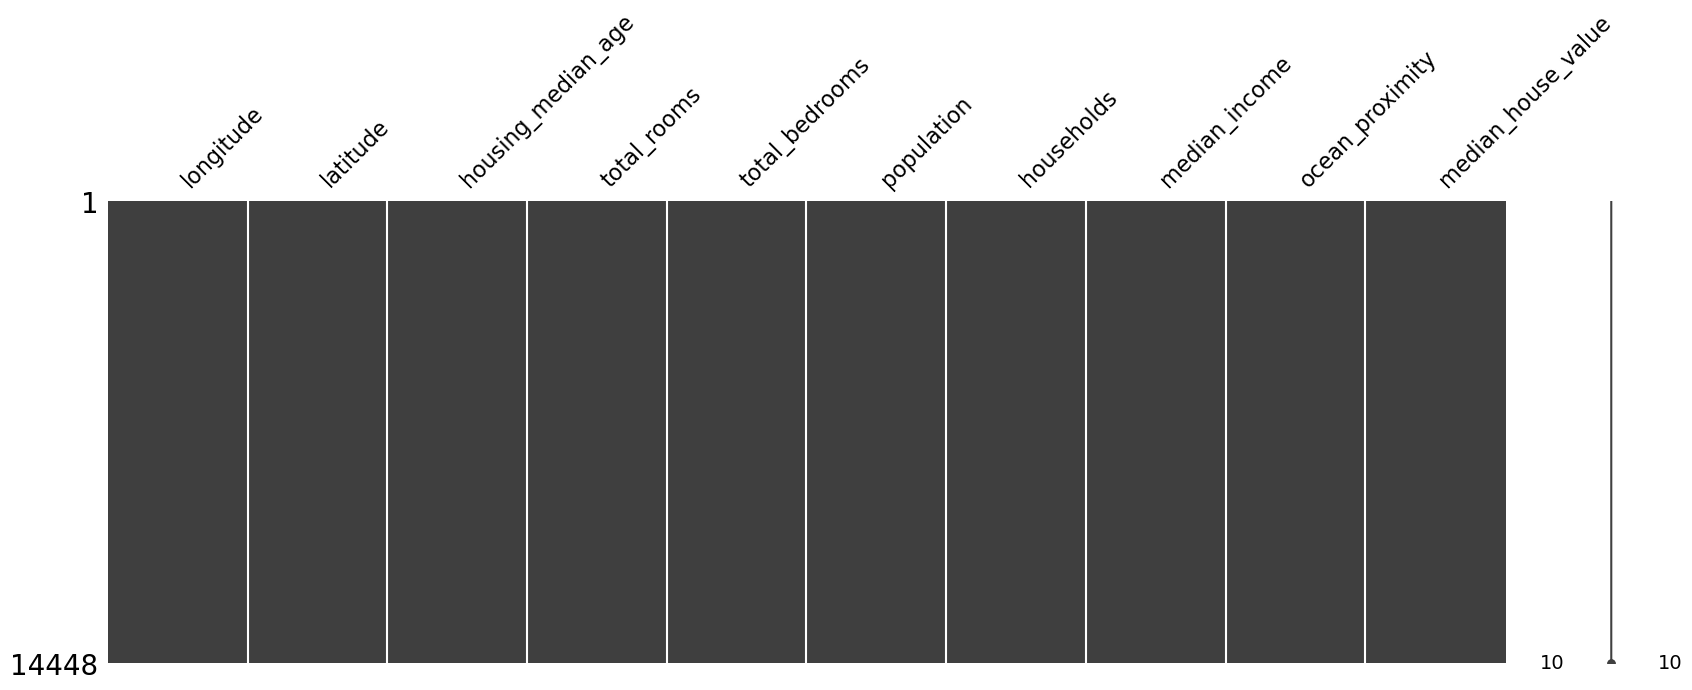

In [162]:
msno.matrix(data_frame,figsize=(20,6))
plt.show()

In [164]:
data_frame['total_rooms'].value_counts()

total_rooms
1582.0     14
1722.0     13
1613.0     13
1705.0     12
1703.0     12
           ..
10191.0     1
4949.0      1
101.0       1
7326.0      1
367.0       1
Name: count, Length: 5227, dtype: int64

In [169]:
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    upper_limit = q3 + limit
    lower_limit = q1 - limit
    print(f'upper_limit: {upper_limit}')
    print(f'lower_limit: {lower_limit}')     

In [174]:
find_anomalies(data_frame['housing_median_age'])

IQR: 19.0
upper_limit: 65.5
lower_limit: -10.5


In [170]:
find_anomalies(data_frame['total_rooms'])

IQR: 1697.0
upper_limit: 5693.5
lower_limit: -1094.5


In [171]:
find_anomalies(data_frame['total_bedrooms'])

IQR: 349.0
upper_limit: 1168.5
lower_limit: -227.5


In [172]:
find_anomalies(data_frame['population'])

IQR: 940.0
upper_limit: 3134.0
lower_limit: -626.0


In [175]:
find_anomalies(data_frame['households'])

IQR: 325.0
upper_limit: 1091.5
lower_limit: -208.5


In [176]:
find_anomalies(data_frame['median_income'])

IQR: 2.1655000000000006
upper_limit: 7.984350000000001
lower_limit: -0.6776500000000012


In [178]:
find_anomalies(data_frame['median_house_value'])

IQR: 144300.0
upper_limit: 480350.0
lower_limit: -96850.0


In [179]:
data_frame[data_frame['housing_median_age']>65.5].count()['housing_median_age']

0

Text(0.5, 0, 'Range Selected Housing Median Age')

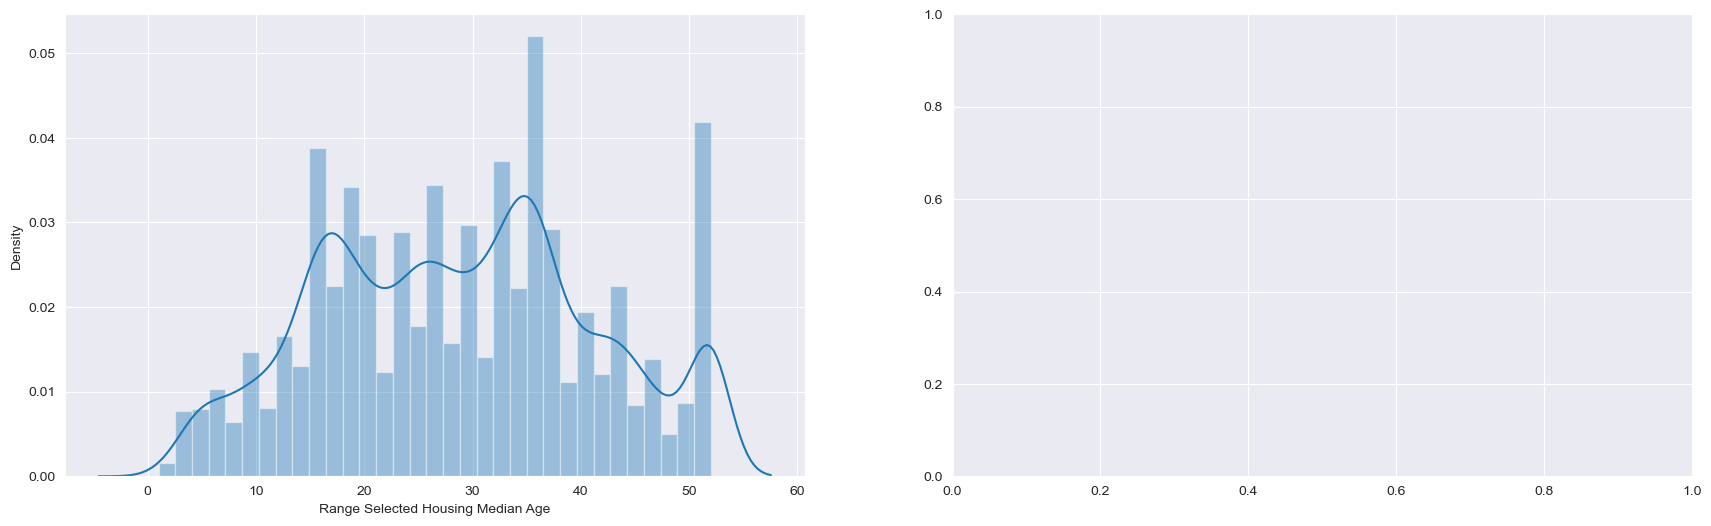

In [194]:
data_frame = data_frame[(data_frame['housing_median_age'] <= 65.5)]

fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data_frame['housing_median_age'], ax=axes[0])
axes[0].set_xlabel('Range Selected Housing Median Age')

In [181]:
data_frame['housing_median_age'].describe()

count    14448.000000
mean        28.618702
std         12.596694
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [182]:
data_frame[data_frame['total_rooms']>16970].count()['total_rooms']

40

In [183]:
data_frame = data_frame[(data_frame['total_rooms']<=16970)]

Text(0.5, 0, 'Range Selected Total Rooms')

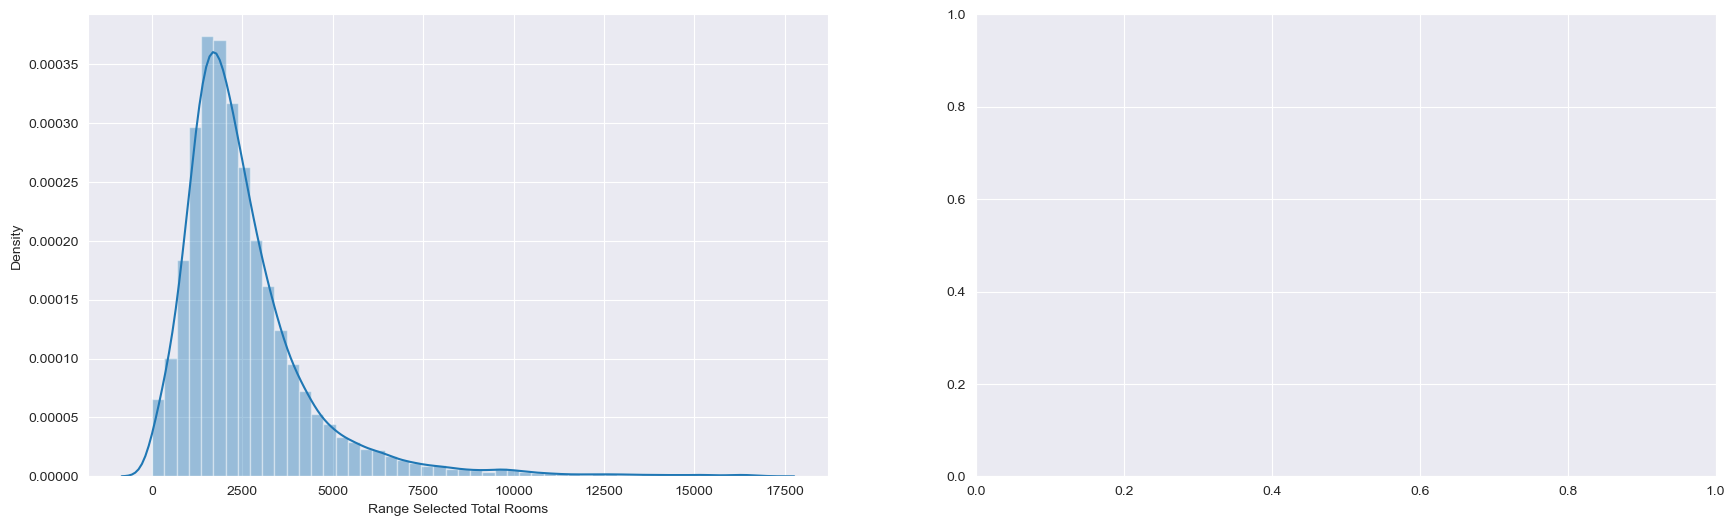

In [206]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data_frame['total_rooms'], ax=axes[0])
axes[0].set_xlabel('Range Selected Total Rooms')

In [196]:
data_frame['total_rooms'].describe()

count    14408.000000
mean      2586.546086
std       1928.682495
min          2.000000
25%       1449.000000
50%       2121.500000
75%       3135.250000
max      16921.000000
Name: total_rooms, dtype: float64

In [197]:
data_frame = data_frame[(data_frame['total_bedrooms'])<=3490]

Text(0.5, 0, 'Range Selected Total Bedrooms')

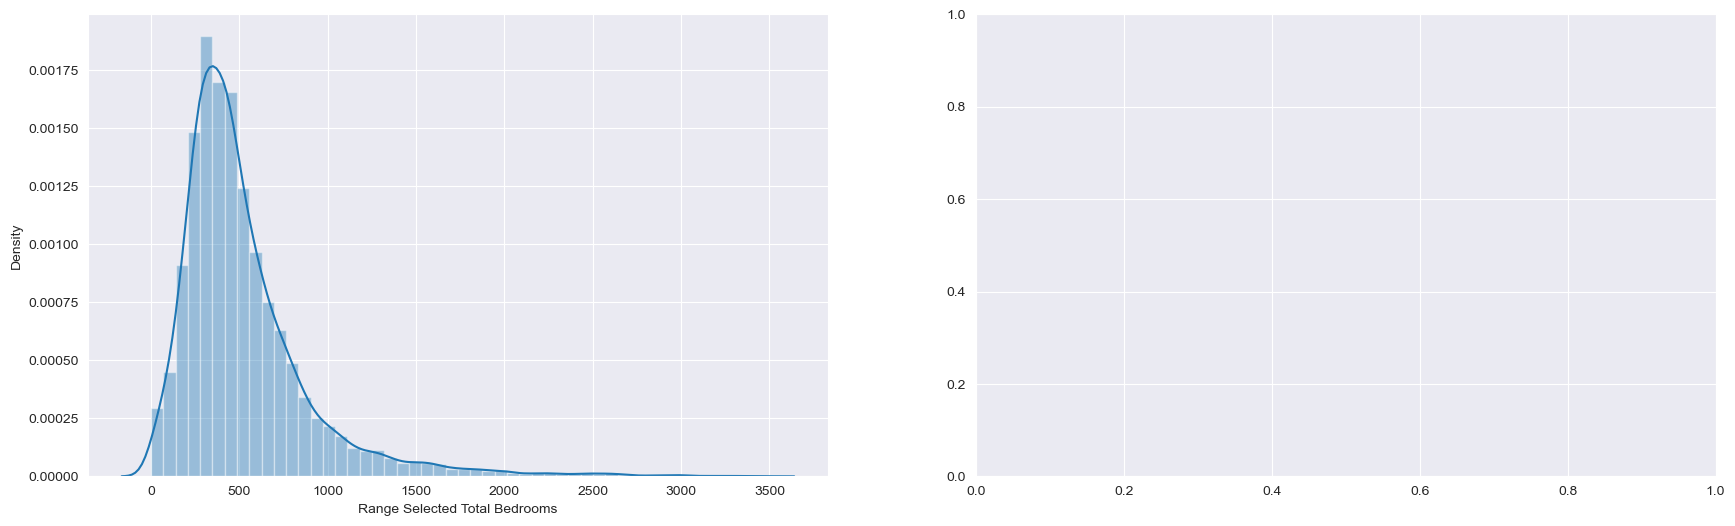

In [205]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data_frame['total_bedrooms'], ax=axes[0])
axes[0].set_xlabel('Range Selected Total Bedrooms')

In [199]:
data_frame['total_bedrooms'].describe()

count    14403.000000
mean       527.144275
std        378.266899
min          1.000000
25%        295.000000
50%        435.000000
75%        642.000000
max       3474.000000
Name: total_bedrooms, dtype: float64

In [200]:
data_frame = data_frame[(data_frame['population']<=9400)]

Text(0.5, 0, 'Range Selected Population')

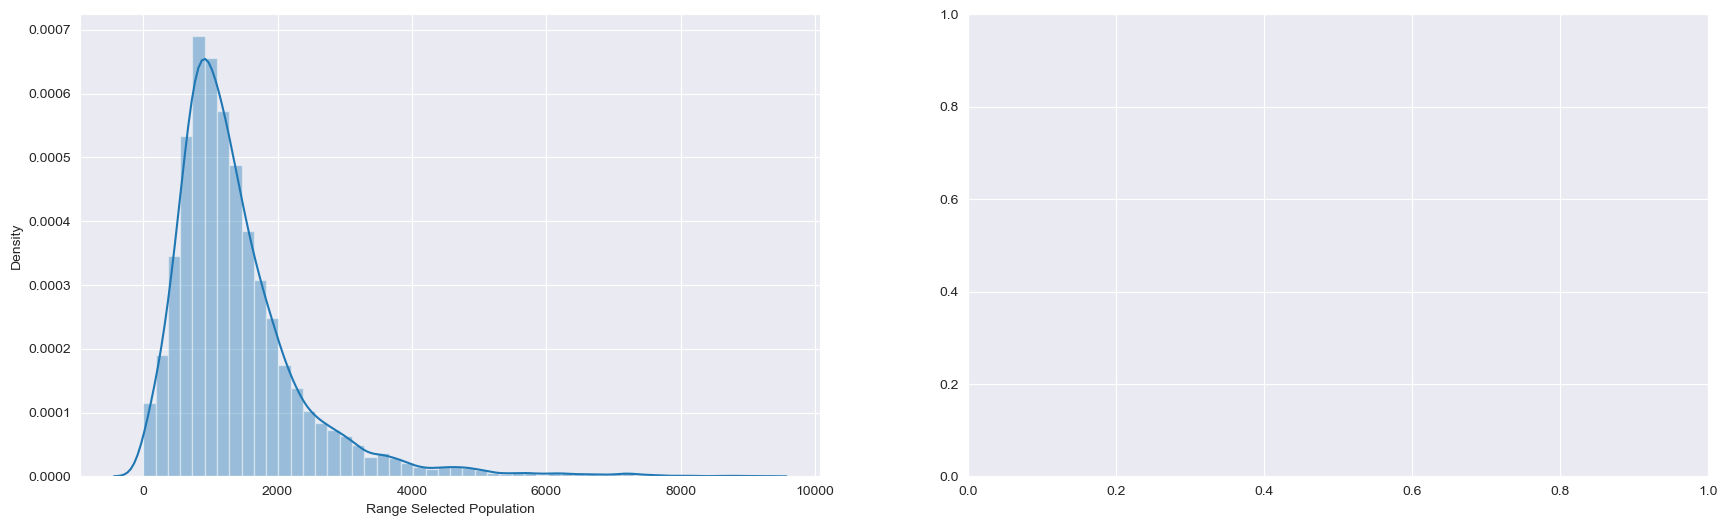

In [204]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data_frame['population'], ax=axes[0])
axes[0].set_xlabel('Range Selected Population')

In [202]:
data_frame['population'].describe()

count    14400.000000
mean      1396.449236
std        991.533411
min          3.000000
25%        783.000000
50%       1162.000000
75%       1715.250000
max       9135.000000
Name: population, dtype: float64

In [203]:
data_frame = data_frame[(data_frame['households']<=3250)]

Text(0.5, 0, 'Range Selected Households')

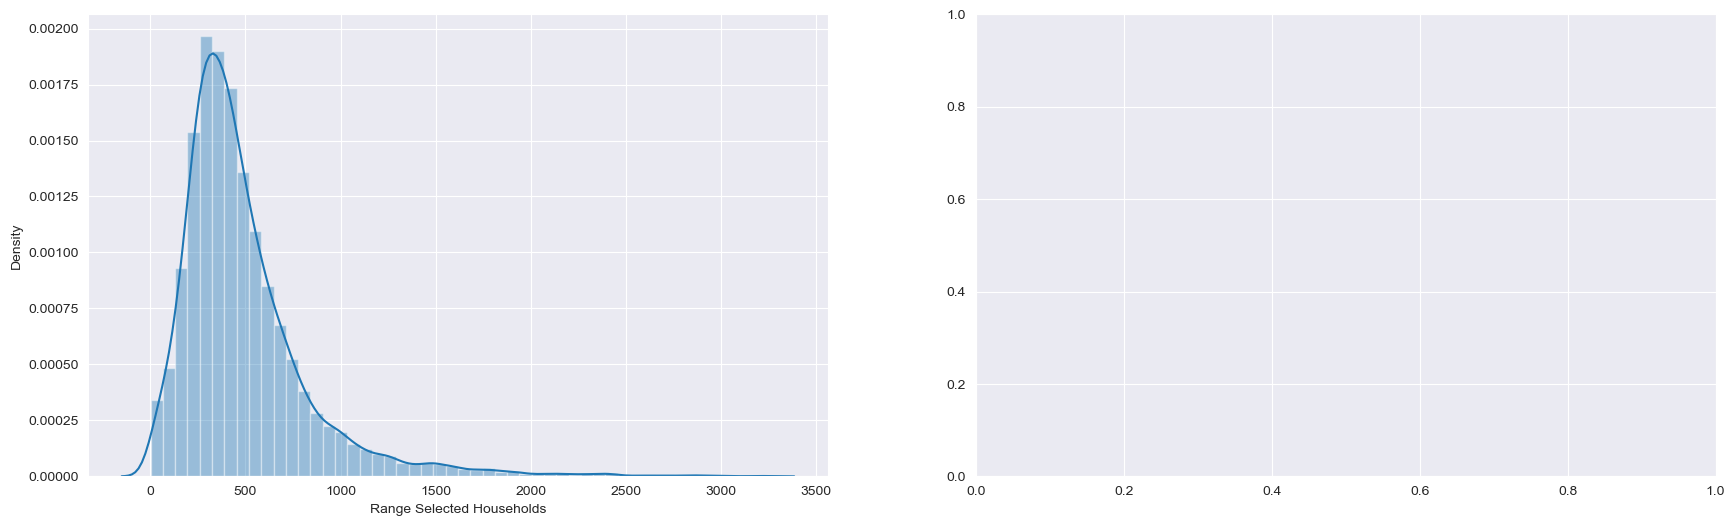

In [207]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data_frame['households'], ax=axes[0])
axes[0].set_xlabel('Range Selected Households')

In [208]:
data_frame['households'].describe()

count    14399.000000
mean       490.069658
std        343.854035
min          1.000000
25%        278.000000
50%        409.000000
75%        601.000000
max       3234.000000
Name: households, dtype: float64

In [209]:
data_frame = data_frame[(data_frame['median_income']<=7.984350000000001)]

Text(0.5, 0, 'Range Selected Median Income')

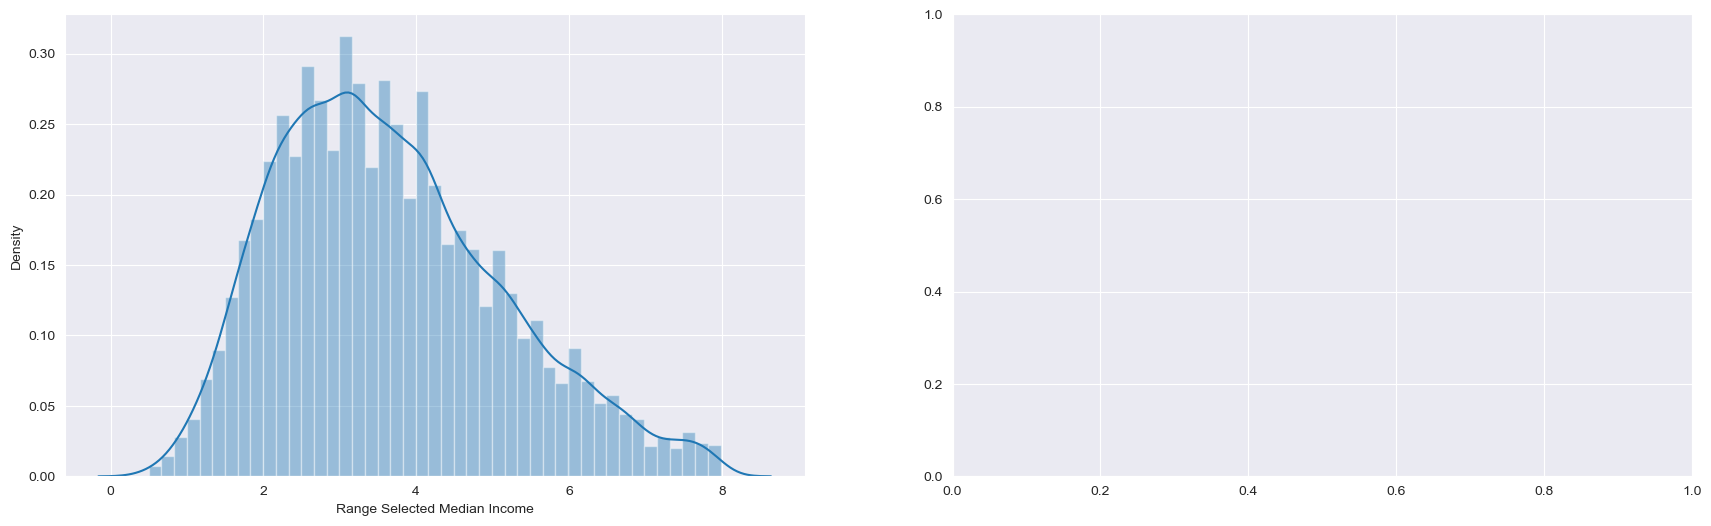

In [210]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data_frame['median_income'], ax=axes[0])
axes[0].set_xlabel('Range Selected Median Income')

In [211]:
data_frame['median_income'].describe()

count    13920.000000
mean         3.649540
std          1.480075
min          0.499900
25%          2.538800
50%          3.470600
75%          4.579975
max          7.983500
Name: median_income, dtype: float64

In [213]:
data_frame = data_frame[(data_frame['median_house_value']<=1443000)]

Text(0.5, 0, 'Range Selected Median House Value')

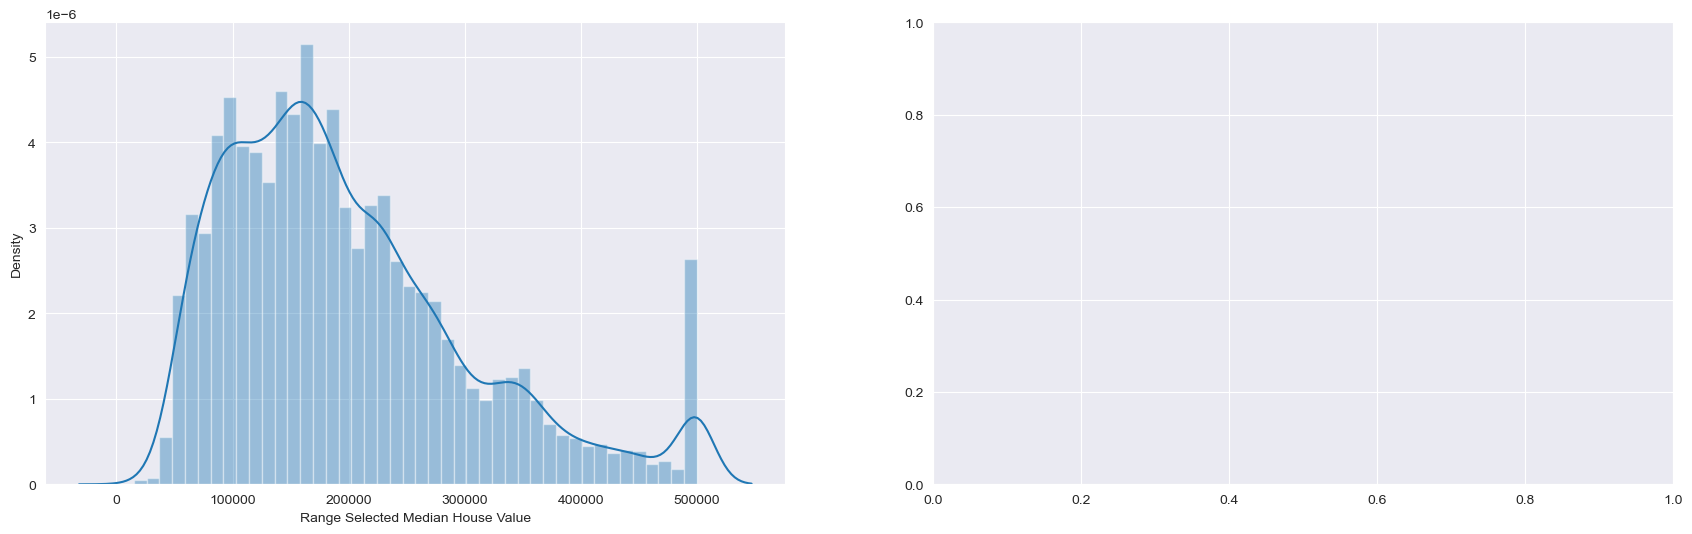

In [214]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(data_frame['median_house_value'], ax=axes[0])
axes[0].set_xlabel('Range Selected Median House Value')

In [215]:
data_frame['median_house_value'].describe()

count     13920.000000
mean     197862.884770
std      106194.755819
min       14999.000000
25%      117400.000000
50%      175200.000000
75%      252800.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [217]:
data_frame = data_frame.drop(columns=['total_rooms_bins'])

In [218]:
data_frame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [219]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13920 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           13920 non-null  float64
 1   latitude            13920 non-null  float64
 2   housing_median_age  13920 non-null  float64
 3   total_rooms         13920 non-null  float64
 4   total_bedrooms      13920 non-null  float64
 5   population          13920 non-null  float64
 6   households          13920 non-null  float64
 7   median_income       13920 non-null  float64
 8   ocean_proximity     13920 non-null  object 
 9   median_house_value  13920 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


<Axes: >

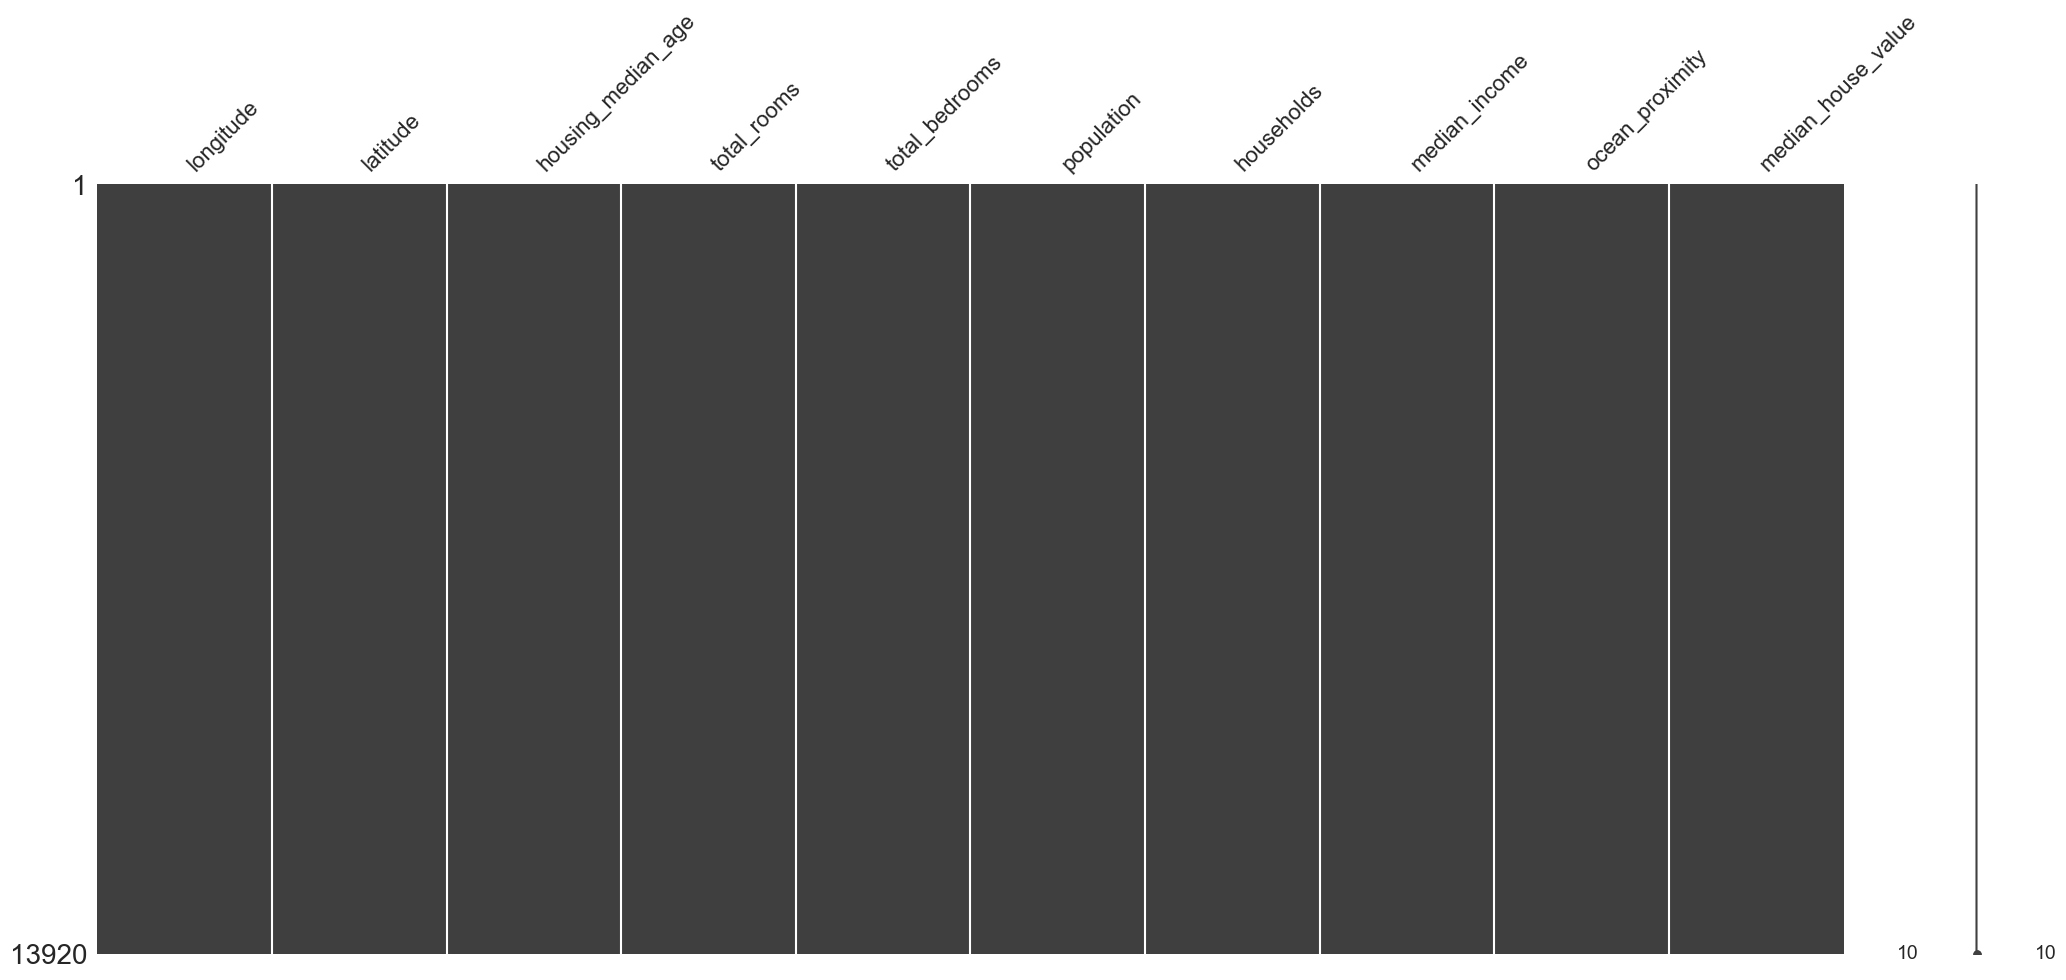

In [220]:
msno.matrix(data_frame)

In [222]:
data_frame.to_csv(r'D:/Bootcamp/Tugas/Capstone_Project_3/California House/data_california_house_clean.csv', index= False)